## Optimizing Distribution Facility locations


### Import Packages

In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import copy

### Inputs - Instance 1

In [321]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of candidate locations
n=100

#Number of locations to open
openfac=15

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

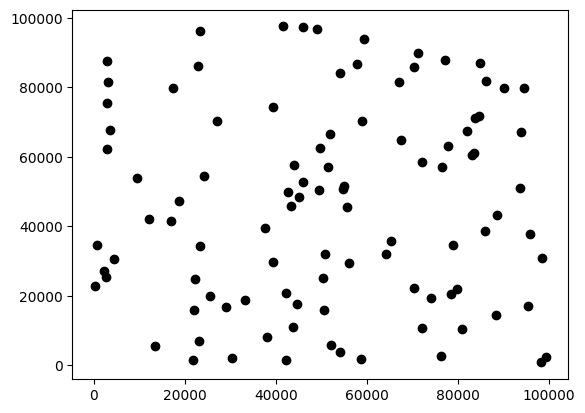

In [255]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Inputs - Instance 2

In [340]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of candidate locations
n=1000

#Number of locations to open
openfac=30

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

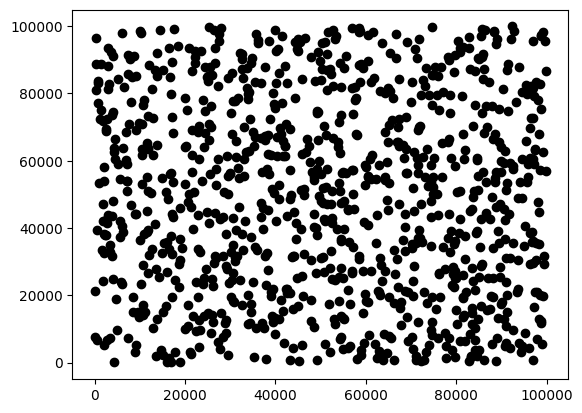

In [345]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Outputs

#### Initial Solution

In [390]:
#Setting up initial solution
random.seed(1)
###This is incorrectly introducing k new facilities
#fac_coordlct_x = random.choices(range(0, rangelct), k=openfac)
#fac_coordlct_y = random.choices(range(0, rangelct), k=openfac)

#choosing k facilities from the already generated
indices = random.sample(range(n), openfac)
indices.sort(reverse=True)
removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
removed_indices = list(range(n))


fac_coordlct_x, fac_coordlct_y = [], []
for index in indices:
    fac_coordlct_x.append(removedX.pop(index))
    fac_coordlct_y.append(removedY.pop(index))
    removed_indices.pop(index)
    

print(indices)
print(removed_indices)




[914, 867, 855, 821, 807, 785, 782, 780, 779, 712, 667, 622, 582, 507, 499, 483, 460, 456, 443, 399, 388, 272, 261, 214, 137, 120, 96, 64, 29, 2]
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197

9721066.803413063
{914: [0, 8, 9, 13, 56, 91, 124, 128, 140, 150, 168, 181, 220, 262, 266, 280, 287, 291, 321, 326, 342, 347, 373, 404, 454, 467, 488, 490, 496, 503, 569, 602, 620, 631, 633, 637, 644, 646, 676, 678, 685, 689, 700, 707, 720, 737, 739, 741, 742, 815, 822, 823, 826, 869, 870, 932, 951], 214: [1, 18, 22, 40, 48, 101, 121, 171, 180, 202, 222, 230, 264, 271, 288, 304, 348, 354, 368, 407, 420, 439, 470, 495, 522, 525, 643, 681, 701, 721, 729, 736, 791, 808, 812, 818, 841, 844, 848, 897, 930, 939, 942, 950, 970, 988, 990], 867: [3, 76, 88, 103, 141, 143, 158, 169, 185, 209, 283, 292, 312, 341, 394, 414, 462, 576, 577, 579, 657, 664, 771, 834, 837, 840, 919, 935, 966, 992], 29: [4, 21, 37, 38, 54, 81, 86, 87, 89, 99, 108, 133, 139, 194, 216, 253, 277, 295, 330, 367, 384, 389, 406, 451, 459, 485, 497, 545, 562, 570, 584, 591, 629, 630, 641, 653, 654, 679, 743, 829, 857, 876, 895, 908, 925, 927, 946, 994], 137: [5, 51, 78, 84, 111, 142, 161, 165, 184, 199, 231, 243, 293, 318, 333

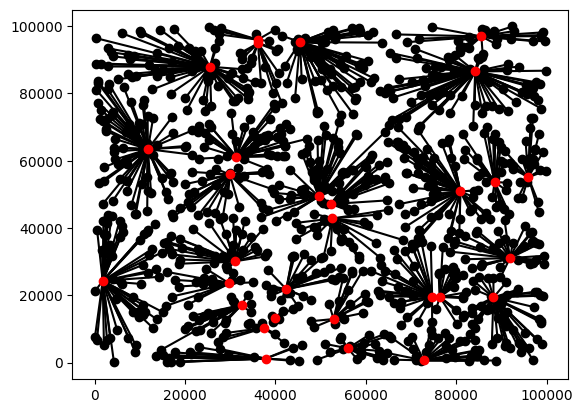

In [391]:
def connectpoints(x1,y1,x2,y2):
    plt.plot([x1,x2],[y1,y2],'k-')

#for i_index in range(len(linkindex_p2)): 
   # connectpoints(coordlct_x,coordlct_y,fac_coordlct_x[i_index],fac_coordlct_y[i_index])

def distance (x1, y1, x2, y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

def plot_min_dist(x, y, kx, ky):
    obj = 0
    for idx in range(n - openfac):
        min = 0
        chosenK = 0
        for idx_k in range(openfac):
            currentDist = distance(x[idx], y[idx], kx[idx_k], ky[idx_k])
            if currentDist < min or min == 0:
                min = currentDist
                chosenK = idx_k
        connectpoints(x[idx], y[idx], kx[chosenK], ky[chosenK])
        obj += min
    return obj

def plot_min_dist2(soln_dictionary):
    for facil in list(soln_dictionary.keys()):
        for neighbour in soln_dictionary[facil]:
            connectpoints(coordlct_x[neighbour], coordlct_y[neighbour], coordlct_x[facil], coordlct_y[facil])

def calc_min_dist(x, y, kx, ky, tindices):
    obj = 0
    soln = {}
    
    # Step 1: Populate soln with actual neighbors
    for idx in range(n - openfac):
        min_dist = float('inf')
        chosenK = None
        for idx_k in range(openfac):
            currentDist = distance(x[idx], y[idx], kx[idx_k], ky[idx_k])
            if currentDist < min_dist:
                min_dist = currentDist
                chosenK = idx_k
        # Update Solution Dictionary with closest facility
        if soln.get(tindices[chosenK]) is None:
            soln[tindices[chosenK]] = [removed_indices[idx]]
        else:
            soln[tindices[chosenK]].append(removed_indices[idx])
        obj += min_dist
    
    # Step 2: Ensure all facilities are in the solution dictionary with empty lists if no neighbors
    for facil in tindices:
        if facil not in list(soln.keys()):
            soln[facil] = []
            #print("Facility with no neighbors added:", facil)
    
    return obj, soln



ObjValue, Solution = calc_min_dist(removedX, removedY, fac_coordlct_x, fac_coordlct_y, indices)
plot_min_dist2(Solution)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(fac_coordlct_x, fac_coordlct_y, 'o', color='red');
print(ObjValue)
print(Solution)
# for x, y, name in zip(fac_coordlct_x, fac_coordlct_y, sorted(list(Solution.keys()))):
#     plt.text(x, y, name, fontsize=12, ha='right')


#### Random Sample

In [258]:
random.seed(3)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 




while cputime_i[-1]<30:
    
    iteration=iteration+1
    
    #Random permutation
    indices = random.sample(range(n), openfac)
    indices.sort(reverse=True)
    removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
    removed_indices = list(range(n))
    

    fac_coordlct_x, fac_coordlct_y = [], []
    for index in indices:
        fac_coordlct_x.append(removedX.pop(index))
        fac_coordlct_y.append(removedY.pop(index))
        removed_indices.pop(index)
    
    #Compute Objective Value
    ObjValue, Solution = calc_min_dist(removedX, removedY, fac_coordlct_x, fac_coordlct_y, indices)
    
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        OptIndices = copy.deepcopy(indices)
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolutionX=copy.deepcopy(fac_coordlct_x)
        OptSolutionY=copy.deepcopy(fac_coordlct_y)
        OptSolution = copy.deepcopy(Solution)
        
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
        
    print(ObjValueOpt)
    
    #Code for Updating Plot
    # plt.plot(removedX, removedY, 'o', color='black');
    # plt.plot(fac_coordlct_x, fac_coordlct_y, 'o', color='red');

    # plt.draw()
    # plt.pause(0.1)
    # plt.clf()
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

1245436.2694450724
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191

904890.7894671629
{18: [1, 17, 53, 80, 82], 11: [4, 5, 33, 37, 64, 66, 69, 89, 98, 99], 41: [6, 7, 38, 74, 90, 94], 39: [8, 9, 30, 42, 57, 77], 48: [10, 22, 36, 46, 67, 93], 44: [12, 51, 58, 62, 92, 95, 96], 72: [13, 20, 35, 91], 28: [14, 23, 25, 47, 50, 54, 68, 78, 81], 2: [15, 63], 60: [16, 19, 26, 56, 71, 83, 88], 86: [21, 45, 49, 59, 70, 73, 75, 87], 0: [24, 31], 3: [27, 32, 34, 43], 40: [52, 79, 85], 29: [55, 61, 65, 76, 84, 97]}


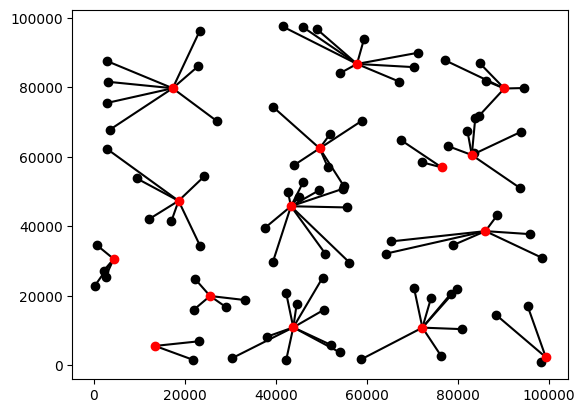

In [259]:

removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
for index in OptIndices:
    removedX.pop(index)
    removedY.pop(index)
plot_min_dist(removedX, removedY, OptSolutionX, OptSolutionY)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(OptSolutionX, OptSolutionY, 'o', color='red');
print(ObjValueOpt)
print(OptSolution)


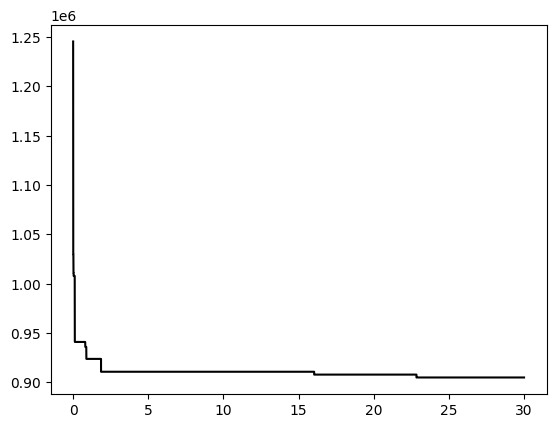

In [260]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

#### Local Search

In [343]:
def swap_with_neighbour(soln_dictionary):
    #print(soln_dictionary)
    one_move = []
    for i in range(openfac):
        #choose one facil to improve
        chosen = sorted(list(soln_dictionary.keys()))[i]
        new_indices = [x for x in indices]
        if soln_dictionary[chosen]:
            chosen_neighbour = random.choice(soln_dictionary[chosen])
            new_indices = [chosen_neighbour if x == chosen else x for x in indices]
            #print(chosen, chosen_neighbour)
        #else:
            #("This has no neighbours: ", chosen)

        new_indices.sort(reverse=True)
        #print("New indices: " , len(new_indices))
        rX, rY = coordlct_x.copy(), coordlct_y.copy()
        r_indices = list(range(n))


        fac_x, fac_y = [], []
        for index in new_indices:
            fac_x.append(rX.pop(index))
            fac_y.append(rY.pop(index))
            r_indices.pop(index)
        TempObjValue, TempSolution = calc_min_dist(rX, rY, fac_x, fac_y, new_indices)
        one_move.append((TempObjValue, TempSolution))
    
    #print(one_move)
    best_move = min(one_move, key=lambda x: x[0])
    while len(best_move[1].keys()) != len(new_indices):
        one_move.remove(best_move)
        best_move = min(one_move, key=lambda x: x[0])
    return best_move
    
def swap_all_neighbour(soln_dictionary):
    #print(soln_dictionary)
    one_move = []
    for i in range(openfac):
        #choose one facil to improve
        chosen = sorted(list(soln_dictionary.keys()))[i]
        temp_indices = [x for x in indices]
        if soln_dictionary[chosen]:
            for chosen_neighbour in soln_dictionary[chosen]:  # Check every neighbour
                if chosen_neighbour in temp_indices:
                    break
                temp_indices = [chosen_neighbour if x == chosen else x for x in indices]
                #print(chosen, chosen_neighbour)
                
                temp_indices.sort(reverse=True)
                #print("New indices: " , len(temp_indices))
                rX, rY = coordlct_x.copy(), coordlct_y.copy()
                r_indices = list(range(n))
                
                fac_x, fac_y = [], []
                #print(temp_indices)
                for index in temp_indices:
                    fac_x.append(rX.pop(index))
                    fac_y.append(rY.pop(index))
                    r_indices.pop(index)
                
                TempObjValue, TempSolution = calc_min_dist(rX, rY, fac_x, fac_y, temp_indices)
                one_move.append((TempObjValue, TempSolution))
    
    #print(one_move)
    best_move = min(one_move, key=lambda x: x[0])
    while len(best_move[1].keys()) != len(temp_indices):
        one_move.remove(best_move)
        best_move = min(one_move, key=lambda x: x[0])
    return best_move





    




In [344]:
random.seed(8)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 
OptIndices = copy.deepcopy(indices)



while cputime_i[-1]<60:
    
    iteration=iteration+1
    
    #K opt the solution

    
    #Compute Objective Value
    #ObjValue, Solution= swap_with_neighbour(Solution)
    ObjValue, Solution= swap_all_neighbour(Solution) #trying bigger search space
    
    indices = list(Solution.keys())
    indices.sort(reverse=True)
    removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
    removed_indices = list(range(n))


    fac_coordlct_x, fac_coordlct_y = [], []
    for index in indices:
        fac_coordlct_x.append(removedX.pop(index))
        fac_coordlct_y.append(removedY.pop(index))
        removed_indices.pop(index)
    
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        OptIndices = copy.deepcopy(sorted(list(Solution.keys())))
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolutionX=copy.deepcopy(fac_coordlct_x)
        OptSolutionY=copy.deepcopy(fac_coordlct_y)
        OptSolution = copy.deepcopy(Solution)
        
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
        
    print(ObjValueOpt)
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

9280647.302162375
9023736.942455929
8720520.229420198
8427718.813971214
8214976.523446718
8034049.599752835
7870216.09255089
7740096.413914745
7620671.092414541


[4, 16, 26, 32, 35, 39, 40, 68, 70, 78, 80, 92, 93, 94, 97]
802380.646517048
[97, 94, 93, 92, 80, 78, 70, 68, 40, 39, 35, 32, 26, 16, 4]
{32: [0, 3, 24, 27, 31, 34, 44, 51], 80: [1, 46, 50, 74, 83], 93: [2, 10, 15, 17, 18, 22, 36, 49, 54, 64, 69], 4: [5, 11, 33, 37, 62, 65, 66, 85, 90, 99], 78: [6, 14, 38, 48, 55, 67, 71, 98], 94: [7, 42, 47, 75, 91], 39: [8, 30, 43, 58, 79], 26: [9, 19, 57, 72], 92: [12, 45, 53, 59, 63, 95, 96], 35: [13, 20, 73, 94], 70: [21, 60, 76, 87, 88], 68: [23, 25, 28, 52, 82], 97: [29, 56, 77], 16: [61, 84, 89], 40: [81, 86]}


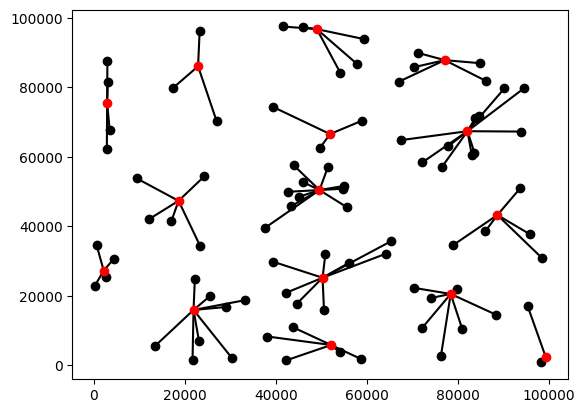

In [338]:
removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
print(OptIndices)
OptIndices.sort(reverse=True)
for index in OptIndices:
    removedX.pop(index)
    removedY.pop(index)

plot_min_dist(removedX, removedY, OptSolutionX, OptSolutionY)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(OptSolutionX, OptSolutionY, 'o', color='red');
# for x, y, name in zip(OptSolutionX, OptSolutionY, sorted(list(Solution.keys()))):
#     plt.text(x, y, name, fontsize=12, ha='right')
print(ObjValueOpt)
print(OptIndices)
print(Solution)

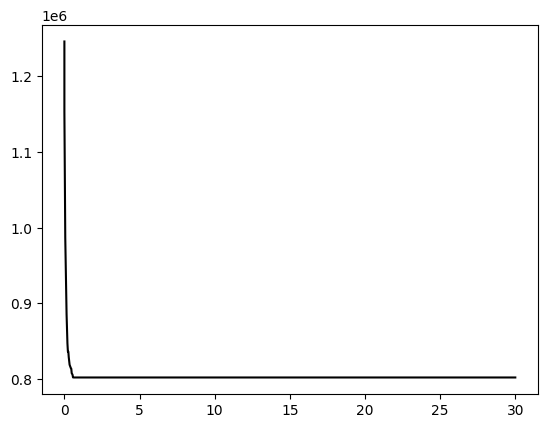

In [339]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

In [204]:
########     DEFUNCT    #########################
#################################################
#Setting k -opt (WRONG FUNCTION )

k = 1

def k_opt(nXY, kXY):
    #nXY is a tuple of x and y coords lists, kxy is a tuple of facil x and y coords lists
    random.seed(5)
    indicesN = random.sample(range(n - openfac), k)
    indicesK = random.sample(range(openfac), k)
    for i in range(k):
        #swap x
        nXY[0][indicesN[i]], kXY[0][indicesK[i]] = kXY[0][indicesK[i]], nXY[0][indicesN[i]]
        #swap y
        nXY[1][indicesN[i]], kXY[1][indicesK[i]] = kXY[1][indicesK[i]], nXY[1][indicesN[i]]

#### Simulated Annealing

In [309]:
def swap_with_neighbour(soln_dictionary):
    #print(soln_dictionary)
    one_move = []
    for i in range(openfac):
        #choose one facil to improve
        chosen = sorted(list(soln_dictionary.keys()))[i]
        new_indices = [x for x in indices]
        if soln_dictionary[chosen]:
            chosen_neighbour = random.choice(soln_dictionary[chosen])
            new_indices = [chosen_neighbour if x == chosen else x for x in indices]
            #print(chosen, chosen_neighbour)
        #else:
            #("This has no neighbours: ", chosen)

        new_indices.sort(reverse=True)
        #print("New indices: " , len(new_indices))
        rX, rY = coordlct_x.copy(), coordlct_y.copy()
        r_indices = list(range(n))


        fac_x, fac_y = [], []
        for index in new_indices:
            fac_x.append(rX.pop(index))
            fac_y.append(rY.pop(index))
            r_indices.pop(index)
        TempObjValue, TempSolution = calc_min_dist(rX, rY, fac_x, fac_y, new_indices)
        one_move.append((TempObjValue, TempSolution))
    
    #print(one_move)
    best_move = min(one_move, key=lambda x: x[0])
    while len(best_move[1].keys()) != len(new_indices):
        one_move.remove(best_move)
        best_move = min(one_move, key=lambda x: x[0])
    return best_move


In [ ]:
random.seed(8)
iteration = 0
ObjValueOpt = ObjValue
Objvalue_list = [ObjValueOpt]
program_starts = time.time()
cputime_i = [0]
OptIndices = copy.deepcopy(indices)

# Initial temperature and cooling parameters
temp = 1000000  # Starting temperature; adjust as needed
cooling_rate = 0.75  # Cooling rate; closer to 1 for slower cooling
it_T = 0  # Iteration counter for temperature update

while cputime_i[-1] < 30:
    iteration += 1

    # Perform a swap with a neighbor to generate a new solution
    ObjValue, Solution = swap_with_neighbour(Solution)

    indices = list(Solution.keys())
    indices.sort(reverse=True)
    removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
    removed_indices = list(range(n))

    fac_coordlct_x, fac_coordlct_y = [], []
    for index in indices:
        fac_coordlct_x.append(removedX.pop(index))
        fac_coordlct_y.append(removedY.pop(index))
        removed_indices.pop(index)

    # Compute the difference in objective value (energy change)
    diff = ObjValue - ObjValueOpt

    # Update temperature on a periodic basis
    if it_T > 20:
        tp = temp / float(iteration + 1)  # Example cooling schedule
        it_T = 0
    else:
        tp = temp * (cooling_rate ** iteration)  # Alternative schedule with cooling rate
    
    it_T += 1  # Increment temperature update counter

    # Compute the Metropolis acceptance criterion
    metropolis = np.exp(-diff / tp) if tp > 0 else 0

    # Decide to accept the new solution based on the Metropolis criterion
    if diff < 0 or random.random() < metropolis:
        ObjValueOpt = copy.deepcopy(ObjValue)
        OptSolution = copy.deepcopy(Solution)
        OptIndices = copy.deepcopy(sorted(list(Solution.keys())))
        OptSolutionX = copy.deepcopy(fac_coordlct_x)
        OptSolutionY = copy.deepcopy(fac_coordlct_y)

    # Record values for analysis
    Objvalue_list.append(ObjValueOpt)
    now = time.time()
    cputime_i.append(now - program_starts)

    print(f"Iteration {iteration}: Best Objective Value = {ObjValueOpt}, Temperature = {tp}")

# Final update to the objective value list
Objvalue_list.append(min(Objvalue_list))
now = time.time()
cputime_i.append(now - program_starts)

Iteration 1: Best Objective Value = 9433947.527191266, Temperature = 750000.0
Iteration 2: Best Objective Value = 9137642.253742216, Temperature = 562500.0
Iteration 3: Best Objective Value = 8939125.498574639, Temperature = 421875.0
Iteration 4: Best Objective Value = 8700385.045725523, Temperature = 316406.25
Iteration 5: Best Objective Value = 8471597.736796463, Temperature = 237304.6875
Iteration 6: Best Objective Value = 8303556.420246564, Temperature = 177978.515625
Iteration 7: Best Objective Value = 8100204.78842509, Temperature = 133483.88671875
Iteration 8: Best Objective Value = 7962201.105050548, Temperature = 100112.9150390625
Iteration 9: Best Objective Value = 7869542.703711135, Temperature = 75084.68627929688
Iteration 10: Best Objective Value = 7675238.0457385415, Temperature = 56313.514709472656
Iteration 11: Best Objective Value = 7552090.9820473455, Temperature = 42235.13603210449
Iteration 12: Best Objective Value = 7466396.37749359, Temperature = 31676.35202407837

C:\Users\Amith\AppData\Local\Temp\ipykernel_40760\1855522273.py:44: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-diff / tp) if tp > 0 else 0


Iteration 45: Best Objective Value = 6870707.098469706, Temperature = 2.386474799099523
Iteration 46: Best Objective Value = 6862459.8346474795, Temperature = 1.7898560993246424
Iteration 47: Best Objective Value = 6859997.345933609, Temperature = 1.3423920744934816
Iteration 48: Best Objective Value = 6859997.345933609, Temperature = 1.0067940558701114
Iteration 49: Best Objective Value = 6857686.797496576, Temperature = 0.7550955419025834
Iteration 50: Best Objective Value = 6856459.684915626, Temperature = 0.5663216564269377
Iteration 51: Best Objective Value = 6845197.912390919, Temperature = 0.4247412423202032
Iteration 52: Best Objective Value = 6839503.124357197, Temperature = 0.3185559317401524
Iteration 53: Best Objective Value = 6816334.639408531, Temperature = 0.2389169488051143
Iteration 54: Best Objective Value = 6809266.716141719, Temperature = 0.17918771160383576
Iteration 55: Best Objective Value = 6809266.716141719, Temperature = 0.1343907837028768
Iteration 56: Best O

[8, 67, 69, 104, 120, 121, 170, 212, 229, 233, 319, 335, 345, 386, 393, 398, 485, 546, 581, 588, 631, 656, 759, 830, 840, 875, 896, 901, 939, 975]
6637660.573793479
[975, 939, 901, 896, 875, 840, 830, 759, 656, 631, 588, 581, 546, 485, 398, 393, 386, 345, 335, 319, 233, 229, 212, 170, 121, 120, 104, 69, 67, 8]
{631: [0, 9, 56, 77, 91, 124, 128, 132, 140, 181, 185, 195, 221, 266, 280, 287, 321, 332, 342, 373, 408, 454, 467, 490, 496, 569, 602, 611, 633, 644, 676, 707, 725, 737, 742, 815, 834, 866, 870, 942], 121: [1, 2, 10, 12, 18, 58, 101, 117, 119, 126, 160, 171, 202, 214, 230, 271, 288, 329, 334, 340, 368, 407, 419, 442, 470, 494, 538, 552, 589, 595, 643, 652, 663, 701, 722, 736, 740, 777, 796, 855, 897, 941, 958, 969], 345: [3, 24, 50, 83, 88, 113, 135, 141, 169, 268, 292, 312, 316, 322, 362, 394, 449, 579, 642, 651, 657, 664, 710, 745, 754, 771, 779, 781, 854, 867, 921, 937, 965, 982], 485: [4, 6, 21, 37, 81, 86, 89, 108, 109, 110, 133, 277, 295, 374, 389, 437, 458, 516, 575, 591, 

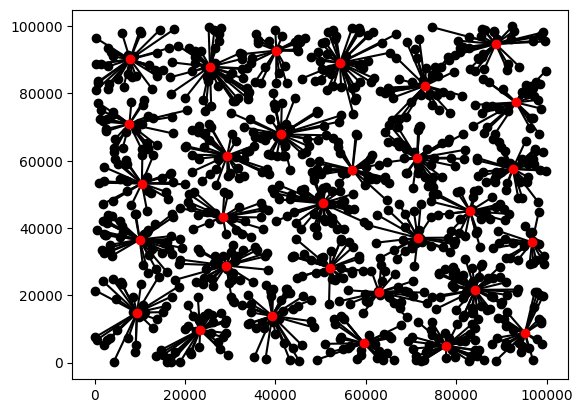

In [388]:
removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
print(OptIndices)
OptIndices.sort(reverse=True)
for index in OptIndices:
    removedX.pop(index)
    removedY.pop(index)

plot_min_dist(removedX, removedY, OptSolutionX, OptSolutionY)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(OptSolutionX, OptSolutionY, 'o', color='red');
# for x, y, name in zip(OptSolutionX, OptSolutionY, sorted(list(Solution.keys()))):
#     plt.text(x, y, name, fontsize=12, ha='right')
print(ObjValueOpt)
print(OptIndices)
print(Solution)

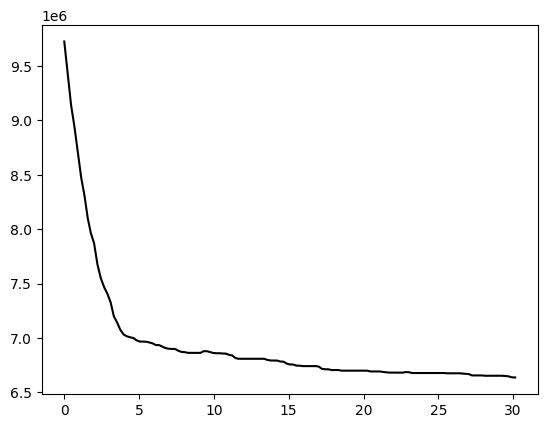

In [389]:
plt.plot(cputime_i[:len(Objvalue_list)], Objvalue_list, 'k-')